The Merging Syntax in Pandas is emulated from SQL

# Merging the Datasets

Essentially Stiching the Datasets together. Data can be Multiple Files, Database Dumps etc

In [1]:
# Importing the Libraries and the Dataframe

import numpy as np
import pandas as pd

# Importing Data

students = pd.read_csv("students.csv")
grades1 = pd.read_csv("grades1.csv")
grades2 = pd.read_csv("grades2.csv")
teacher = pd.read_csv("teachers.csv")
contact = pd.read_csv("contact.csv")

In [2]:
# Display the Heads for All

display(students.head(2))
display(grades1.head(2))
display(grades2.head(2))
display(teacher.head(2))
display(contact.head(2))

,id,firstname,lastname
0,34292,Joshua,Davis
1,34293,Karen,Flores


,student_id,course,grade
0,34292,ENGL101,A
1,34293,ENGL101,A


,student_id,course,grade
0,34302,DRAM101,F
1,34303,DRAM101,D


,course,teacher
0,PHYS101,Wayne Walker
1,CHEM101,Albert Taylor


,student_id,parent_contact,phone
0,34292,Samuel Davis,(356) 849-0352
1,34293,Laura Flores,(477) 325-7117


In [3]:
# Display in a Single Line

display(students.head(2), grades1.head(2), grades2.head(2), teacher.head(2), contact.head(2))

,id,firstname,lastname
0,34292,Joshua,Davis
1,34293,Karen,Flores


,student_id,course,grade
0,34292,ENGL101,A
1,34293,ENGL101,A


,student_id,course,grade
0,34302,DRAM101,F
1,34303,DRAM101,D


,course,teacher
0,PHYS101,Wayne Walker
1,CHEM101,Albert Taylor


,student_id,parent_contact,phone
0,34292,Samuel Davis,(356) 849-0352
1,34293,Laura Flores,(477) 325-7117


#### Merging the Data Vertically

In [4]:
# Join Grades 1 and 2 to a Simple DataFrame

# Create a Semester Column for Grades 1 and 2

grades1['Semester'] = 1
grades2['Semester'] = 2

# Join both using Concat
grades = pd.concat([grades1, grades2])
grades.head()

,student_id,course,grade,Semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1


In [6]:
# Join both using Append

(grades1.copy().append(grades2)).head() # If you Have Same Column Names

# The Index will not be Updated. SO You Need to Reset Index

,student_id,course,grade,Semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1


In [8]:
# Reset Index

grades = grades.reset_index(drop= True) # Drops Old Index Values
grades.tail()

,student_id,course,grade,Semester
185,34312,DESN101,E,2
186,34313,DESN101,D,2
187,34314,DESN101,A,2
188,34315,DESN101,A,2
189,34316,DESN101,A,2


#### Merging the Data Horizontally

In [9]:
# Merge by Joining

student_grades = pd.merge(students, grades, left_on= "id", right_on="student_id")
student_grades.head()

# If 2 columns have same Column name, you can just use 'on'

,id,firstname,lastname,student_id,course,grade,Semester
0,34292,Joshua,Davis,34292,ENGL101,A,1
1,34292,Joshua,Davis,34292,MATH101,A,1
2,34292,Joshua,Davis,34292,PHYS101,D,1
3,34292,Joshua,Davis,34292,MATH102,F,1
4,34292,Joshua,Davis,34292,COMP101,A,1


In [10]:
# Validate their Shapes

print(students.shape, grades.shape, student_grades.shape)

(25, 3) (190, 4) (190, 7)


In [11]:
# Trying for OR

students2 = students.rename({'id':'student_id'}, axis= 1)

# Put Parents Contact for Student Name

students_full = students2.merge(contact, on= "student_id")

students_full.head()

,student_id,firstname,lastname,parent_contact,phone
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352
1,34293,Karen,Flores,Laura Flores,(477) 325-7117
2,34294,Julia,Walker,Eric Walker,(871) 639-0797
3,34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107
4,34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113


In [13]:
# Create and Metge Students Grade

student_grades = students2.merge(grades, on= "student_id")
student_grades.head()

,student_id,firstname,lastname,course,grade,Semester
0,34292,Joshua,Davis,ENGL101,A,1
1,34292,Joshua,Davis,MATH101,A,1
2,34292,Joshua,Davis,PHYS101,D,1
3,34292,Joshua,Davis,MATH102,F,1
4,34292,Joshua,Davis,COMP101,A,1


In [17]:
# Which Students are Failing 2 or More Classes

df2 = student_grades.loc[student_grades['grade'] == "F", "student_id"]

# Methods

display(df2.value_counts()[:5])

method1 = df2.value_counts().rename_axis("Student_id").reset_index(name= "counts")
method1

34300    4
34302    3
34303    2
34309    2
34311    2
Name: student_id, dtype: int64

,Student_id,counts
0,34300,4
1,34302,3
2,34303,2
3,34309,2
4,34311,2
5,34313,2
6,34316,2
7,34292,2
8,34294,2
9,34299,2


In [22]:
method2 = student_grades.loc[student_grades['grade'] == "F", ["student_id", "grade"]].groupby("student_id").count().reset_index()
method2

,student_id,grade
0,34292,2
1,34293,1
2,34294,2
3,34297,1
4,34298,1
5,34299,2
6,34300,4
7,34301,2
8,34302,3
9,34303,2


In [28]:
# Failing Student Ids

sids = method1[method1.counts >= 3].Student_id
sids.head()

0    34300
1    34302
Name: Student_id, dtype: int64

In [30]:
# Get the Full Details of the Failed Students

full = students_full[students_full.student_id.isin(sids)]
full

,student_id,firstname,lastname,parent_contact,phone
8,34300,Mary,Mitchell,Edward Mitchell,(494) 471-1604
10,34302,Dorothy,Green,Russell Green,(749) 344-5744


### Joins

It is a Specific Version of the Merge, that works solely more on Index. With Merge, you generally do one DataFrame at a Time, with Join, you can join Multiple data (indexes)

In [32]:
# Join Looks for Index

students2 = students.set_index("id")
contacts2 = contact.set_index("student_id")

# Join Operation
students2.join(contacts2)

,firstname,lastname,parent_contact,phone
id,,,,
34292,Joshua,Davis,Samuel Davis,(356) 849-0352
34293,Karen,Flores,Laura Flores,(477) 325-7117
34294,Julia,Walker,Eric Walker,(871) 639-0797
34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107
34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113
34297,Gary Lee,Lee,Mary Lee,(914) 452-6366
34298,Ruby,Thompson,Jose Thompson,(253) 419-7702
34299,Heather,Miller,Annie Miller,(864) 583-9615
34300,Mary,Mitchell,Edward Mitchell,(494) 471-1604


### Types of Merging

In [33]:
# Loading Data

df_s = pd.read_csv('students.csv')
df_p = pd.read_csv('contact.csv')
df_g = pd.read_csv('grades1.csv')

In [35]:
# Display them

display(df_s.tail(2), df_p.tail(2), df_g.tail(2))

,id,firstname,lastname
23,34315,Russell,Reed
24,34316,Stephen,Martinez


,student_id,parent_contact,phone
23,34315,Johnny Reed,(708) 871-9155
24,34316,Norma Martinez,(783) 439-7854


,student_id,course,grade
123,34315,DESN101,A
124,34316,DESN101,A


In [36]:
# Get the Data with Design Course

df_desn = df_g[df_g.course == "DESN101"]
print(df_desn.shape, df_s.shape)

(12, 3) (25, 3)


In [37]:
# We have 25 Students, but only 12 took Design course

# Normal Merge

pd.merge(df_s, df_desn, left_on="id", right_on="student_id")

,id,firstname,lastname,student_id,course,grade
0,34295,Cynthia,Robinson,34295,DESN101,C
1,34296,Bonnie,Hall,34296,DESN101,C
2,34297,Gary Lee,Lee,34297,DESN101,A
3,34308,Shawn,Rivera,34308,DESN101,E
4,34309,Lois,James,34309,DESN101,B
5,34310,William,Sanders,34310,DESN101,C
6,34311,Barbara,Peterson,34311,DESN101,D
7,34312,Douglas,Cook,34312,DESN101,E
8,34313,Helen,Allen,34313,DESN101,D
9,34314,Melissa,Price,34314,DESN101,A


In [38]:
# Inner Join

pd.merge(df_s, df_desn, left_on="id", right_on="student_id", how= "inner")

,id,firstname,lastname,student_id,course,grade
0,34295,Cynthia,Robinson,34295,DESN101,C
1,34296,Bonnie,Hall,34296,DESN101,C
2,34297,Gary Lee,Lee,34297,DESN101,A
3,34308,Shawn,Rivera,34308,DESN101,E
4,34309,Lois,James,34309,DESN101,B
5,34310,William,Sanders,34310,DESN101,C
6,34311,Barbara,Peterson,34311,DESN101,D
7,34312,Douglas,Cook,34312,DESN101,E
8,34313,Helen,Allen,34313,DESN101,D
9,34314,Melissa,Price,34314,DESN101,A


In [39]:
# Left Join

# We only Need Results on Left, which doesnt need to be on the Right
pd.merge(df_s, df_desn, left_on="id", right_on="student_id", how= "left")

,id,firstname,lastname,student_id,course,grade
0,34292,Joshua,Davis,NaN,NaN,NaN
1,34293,Karen,Flores,NaN,NaN,NaN
2,34294,Julia,Walker,NaN,NaN,NaN
3,34295,Cynthia,Robinson,34295.0,DESN101,C
4,34296,Bonnie,Hall,34296.0,DESN101,C
5,34297,Gary Lee,Lee,34297.0,DESN101,A
6,34298,Ruby,Thompson,NaN,NaN,NaN
7,34299,Heather,Miller,NaN,NaN,NaN
8,34300,Mary,Mitchell,NaN,NaN,NaN
9,34301,Carlos,Ross,NaN,NaN,NaN


In [40]:
# Right Join

# Keep Everything on the Right Regardless of Everything present on the Left
pd.merge(df_s, df_desn, left_on="id", right_on="student_id", how= "right")

,id,firstname,lastname,student_id,course,grade
0,34295,Cynthia,Robinson,34295,DESN101,C
1,34296,Bonnie,Hall,34296,DESN101,C
2,34297,Gary Lee,Lee,34297,DESN101,A
3,34308,Shawn,Rivera,34308,DESN101,E
4,34309,Lois,James,34309,DESN101,B
5,34310,William,Sanders,34310,DESN101,C
6,34311,Barbara,Peterson,34311,DESN101,D
7,34312,Douglas,Cook,34312,DESN101,E
8,34313,Helen,Allen,34313,DESN101,D
9,34314,Melissa,Price,34314,DESN101,A


In [41]:
# Create a Custom Dataset for Outer Join

df_a = pd.DataFrame({"A": ["X","Y","Z"], "B": [1,2,3]})
df_b = pd.DataFrame({"A": ["U","V","X"], "B": [5.0,4.5,3.0]})

display(df_a, df_b);

,A,B
0,X,1
1,Y,2
2,Z,3


,A,B
0,U,5.0
1,V,4.5
2,X,3.0


In [44]:
# Merge by Inner Join

display( pd.merge(df_a, df_b, on="A") )

# Merge by Outer Join

display( pd.merge(df_a, df_b, on="A", how= "outer") )

,A,B_x,B_y
0,X,1,3.0


,A,B_x,B_y
0,X,1.0,3.0
1,Y,2.0,NaN
2,Z,3.0,NaN
3,U,NaN,5.0
4,V,NaN,4.5


### Duplicate Keys

In [45]:
# Create a Custom Dataset for Duplicate Keys

df_c = pd.DataFrame({"A": ["X","X","Z"], "B": [1,2,3]})
df_d = pd.DataFrame({"A": ["U","X","X"], "B": [5.0,4.5,3.0]})

display(df_c, df_d);

,A,B
0,X,1
1,X,2
2,Z,3


,A,B
0,U,5.0
1,X,4.5
2,X,3.0


In [46]:
pd.merge(df_c, df_d, on= "A")

# Merging Column with Duplicated join keys can easily baloon up how many rows we have

,A,B_x,B_y
0,X,1,4.5
1,X,1,3.0
2,X,2,4.5
3,X,2,3.0


In [48]:
# Rename Suffix words

df_m = pd.merge(df_c, df_d, on= "A", suffixes= ("_left", "_right"))
df_m

,A,B_left,B_right
0,X,1,4.5
1,X,1,3.0
2,X,2,4.5
3,X,2,3.0


In [49]:
# Use Rename Here - Dictionary Rename

df_m.rename(columns= {"B_left":"LeftRenamed", "B_right":"RightRenamed"})

,A,LeftRenamed,RightRenamed
0,X,1,4.5
1,X,1,3.0
2,X,2,4.5
3,X,2,3.0


In [52]:
# Validation - We Expect all students to have contact. We dont have to check shape to validate it

pd.merge(df_s, df_p, left_on="id", right_on="student_id", validate='one_to_one')

# One to One - For Everything on Left, there should be one and only one on the Right - Column on Left&Right are Unique (No !Duplicates)

,id,firstname,lastname,student_id,parent_contact,phone
0,34292,Joshua,Davis,34292,Samuel Davis,(356) 849-0352
1,34293,Karen,Flores,34293,Laura Flores,(477) 325-7117
2,34294,Julia,Walker,34294,Eric Walker,(871) 639-0797
3,34295,Cynthia,Robinson,34295,Chris Robinson,(574) 683-2107
4,34296,Bonnie,Hall,34296,Dorothy Hall,(384) 293-2113
5,34297,Gary Lee,Lee,34297,Mary Lee,(914) 452-6366
6,34298,Ruby,Thompson,34298,Jose Thompson,(253) 419-7702
7,34299,Heather,Miller,34299,Annie Miller,(864) 583-9615
8,34300,Mary,Mitchell,34300,Edward Mitchell,(494) 471-1604
9,34301,Carlos,Ross,34301,Debra Ross,(592) 663-4425


#### Composite Keys  - For Multiple Columns

In [53]:
df_1 = pd.DataFrame({"year": [2000, 2000, 2001, 2001], "sem": [1, 2, 1, 2], 
                     "fee": [200, 200, 200, 200]})
df_2 = pd.DataFrame({"year": [2000, 2000, 2001, 2001], "sem": [1, 2, 1, 2], 
                     "student": [1, 2, 2, 3], "discount": [0.1, 0.2, 0.2, 1.0]})
df_3 = pd.DataFrame({"student": [1, 2, 3, 4, 5]})

display(df_1, df_2, df_3)
from IPython.display import Javascript
Javascript('this.element.attr("style", "flex-direction: row;")')

,year,sem,fee
0,2000,1,200
1,2000,2,200
2,2001,1,200
3,2001,2,200


,year,sem,student,discount
0,2000,1,1,0.1
1,2000,2,2,0.2
2,2001,1,2,0.2
3,2001,2,3,1.0


,student
0,1
1,2
2,3
3,4
4,5


<IPython.core.display.Javascript object>

In [55]:
combined = pd.merge(df_1, df_2, on= ['year', 'sem'])
combined

,year,sem,fee,student,discount
0,2000,1,200,1,0.1
1,2000,2,200,2,0.2
2,2001,1,200,2,0.2
3,2001,2,200,3,1.0


In [56]:
# Calculating the Discounts

combined['due'] = combined['fee'] * (1 - combined['discount'])
combined

,year,sem,fee,student,discount,due
0,2000,1,200,1,0.1,180.0
1,2000,2,200,2,0.2,160.0
2,2001,1,200,2,0.2,160.0
3,2001,2,200,3,1.0,0.0


In [57]:
# Combine Students and their Discounts First

pd.merge(df_3, df_2, on="student", how="left")

,student,year,sem,discount
0,1,2000.0,1.0,0.1
1,2,2000.0,2.0,0.2
2,2,2001.0,1.0,0.2
3,3,2001.0,2.0,1.0
4,4,NaN,NaN,NaN
5,5,NaN,NaN,NaN


In [60]:
# Cross Joins (Cartesian Product)

# We Want the Students with NAN to figure out what year, sem they should have without discount

# Add a Column to both 1 and 3 for Cartesian Multiplication
df_1['Key'], df_3['Key'] = 1,1

# As Keys are Same for both Columns, we will get the Cross Product; Then Drop key column
df_cross = pd.merge(df_1, df_3, on="Key").drop('Key', axis= 1)
df_cross

# By This way we can get the cross product even if you dont have columns aldready in the dataframe

,year,sem,fee,student
0,2000,1,200,1
1,2000,1,200,2
2,2000,1,200,3
3,2000,1,200,4
4,2000,1,200,5
5,2000,2,200,1
6,2000,2,200,2
7,2000,2,200,3
8,2000,2,200,4
9,2000,2,200,5


In [62]:
# Join the Scholarship amount to the Above table

all_fees = pd.merge(df_cross, df_2, on= ['student', 'year', 'sem'], how= 'left')
all_fees

,year,sem,fee,student,discount
0,2000,1,200,1,0.1
1,2000,1,200,2,NaN
2,2000,1,200,3,NaN
3,2000,1,200,4,NaN
4,2000,1,200,5,NaN
5,2000,2,200,1,NaN
6,2000,2,200,2,0.2
7,2000,2,200,3,NaN
8,2000,2,200,4,NaN
9,2000,2,200,5,NaN


In [63]:
# Fill Nan to Zero and Calculate the due amount

all_fees.discount.fillna(0, inplace= True)

# Calculate the Due Amount
all_fees['due'] = all_fees['fee'] * (1 - all_fees['discount'])

all_fees

,year,sem,fee,student,discount,due
0,2000,1,200,1,0.1,180.0
1,2000,1,200,2,0.0,200.0
2,2000,1,200,3,0.0,200.0
3,2000,1,200,4,0.0,200.0
4,2000,1,200,5,0.0,200.0
5,2000,2,200,1,0.0,200.0
6,2000,2,200,2,0.2,160.0
7,2000,2,200,3,0.0,200.0
8,2000,2,200,4,0.0,200.0
9,2000,2,200,5,0.0,200.0


## Merging Functions

In [66]:
# Import Temperature Data

df_aus = pd.read_csv('aus.csv', parse_dates= ['date'], dayfirst= True)
df_usa = pd.read_csv('usa.csv', parse_dates= ['date'], dayfirst= True)
df_bris = pd.read_csv('brisbane.csv', parse_dates= ['date'], dayfirst= True)

# Display them

display(df_aus.head(), df_usa.head(), df_bris.head())

# Show it in Row Form
Javascript('this.element.attr("style", "flex-direction: row;")')

# 1 - Australia - Yearly  Data
# 2 - USA - Quarterly Data
# 3 - Brisbane - Weekly Data

,date,temperature
0,2000-01-20,30.6
1,2001-01-20,32.7
2,2002-01-20,31.2
3,2003-01-20,30.5
4,2004-01-20,31.5


,date,temperature
0,2000-03-01,15.25
1,2000-09-01,15.77
2,2001-03-01,15.98
3,2001-09-01,16.55
4,2002-03-01,15.32


,date,temperature
0,2000-01-01,30.15
1,2000-01-08,30.31
2,2000-01-15,30.99
3,2000-01-22,30.94
4,2000-01-29,29.95


<IPython.core.display.Javascript object>

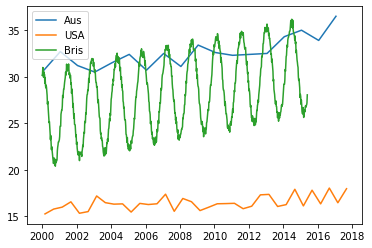

In [68]:
# All 3 Data talks about same thing, but with different frequencies

# Plot the Data

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Register for Pandas Datetime object with Multiple Frequency Warning
 
plt.plot(df_aus.date, df_aus.temperature, label="Aus")
plt.plot(df_usa.date, df_usa.temperature, label="USA")
plt.plot(df_bris.date, df_bris.temperature, label="Bris")
plt.legend();

Why Merge - On Any Given Date, what was Essential Equvialent Temperature in Other locations - Interpolation on the Data is what we follow here

### Ordered merging

Designed for mering ordered data, like time series data.

In [70]:
# Trying Plain Merge

pd.merge(df_aus, df_usa, on="date", how= "outer")

,date,temperature_x,temperature_y
0,2000-01-20,30.6,NaN
1,2001-01-20,32.7,NaN
2,2002-01-20,31.2,NaN
3,2003-01-20,30.5,NaN
4,2004-01-20,31.5,NaN
5,2005-01-20,32.4,NaN
6,2006-01-20,30.7,NaN
7,2007-01-20,32.5,NaN
8,2008-01-20,31.1,NaN
9,2009-01-20,33.4,NaN


In [71]:
# Try using Ordered Merging

pd.merge_ordered(df_aus, df_usa,  on= "date", suffixes= ('_aus', '_usa')).head(10)

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,NaN,15.25
2,2000-09-01,NaN,15.77
3,2001-01-20,32.7,NaN
4,2001-03-01,NaN,15.98
5,2001-09-01,NaN,16.55
6,2002-01-20,31.2,NaN
7,2002-03-01,NaN,15.32
8,2002-09-01,NaN,15.50
9,2003-01-20,30.5,NaN


In [73]:
# Interpolation via Forward Fill

pd.merge_ordered(df_aus, df_usa,  on= "date", suffixes= ('_aus', '_usa'), fill_method= 'ffill').head(10)

# We See 1st Row NaN in USA, which can then be corrected using bfill
# For Brisbane, therell be Weekly Data. So we merge it Differently via Partial/Closest Match

,date,temperature_aus,temperature_usa
0,2000-01-20,30.6,NaN
1,2000-03-01,30.6,15.25
2,2000-09-01,30.6,15.77
3,2001-01-20,32.7,15.77
4,2001-03-01,32.7,15.98
5,2001-09-01,32.7,16.55
6,2002-01-20,31.2,16.55
7,2002-03-01,31.2,15.32
8,2002-09-01,31.2,15.50
9,2003-01-20,30.5,15.50


### Merging with partial/closest matches
Lets say we dont want the huge amount of data in the Brisbane temperatures, but we only want the closest temperature to a given date in either the Australia or USA temperatures.

In [75]:
df_both = pd.merge_ordered(df_aus, df_usa,  on= "date", suffixes= ('_aus', '_usa'), fill_method= 'ffill')

# Merge it with Brisbane Data

df_all = pd.merge_asof(df_both, df_bris, on= "date").rename(columns= {'temperature':'temperature_bris'})
df_all
# Takes Exery row in df_both and figure out what is the closest/partial match it can do to extract one row from df_bris

,date,temperature_aus,temperature_usa,temperature_bris
0,2000-01-20,30.6,NaN,30.99
1,2000-03-01,30.6,15.25,29.31
2,2000-09-01,30.6,15.77,20.68
3,2001-01-20,32.7,15.77,24.71
4,2001-03-01,32.7,15.98,26.40
5,2001-09-01,32.7,16.55,29.21
6,2002-01-20,31.2,16.55,21.99
7,2002-03-01,31.2,15.32,21.66
8,2002-09-01,31.2,15.50,28.50
9,2003-01-20,30.5,15.50,30.45


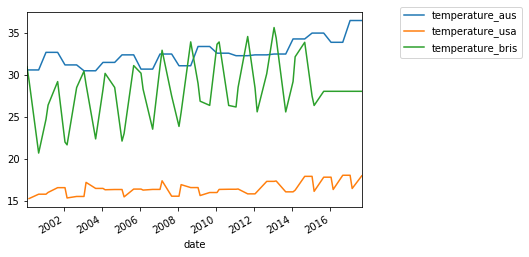

In [78]:
# Plot the Data 

df_all.plot("date", ['temperature_aus','temperature_usa','temperature_bris'])
plt.legend(bbox_to_anchor=(1.1, 1.05));
# The Brisbane Data Fills out to the Same value coz of filling

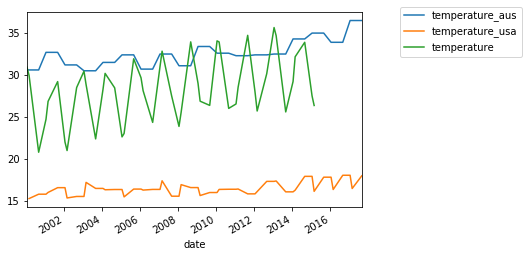

In [80]:
# Match only, if you are within 14 days via TimeDelta

df_tmp = pd.merge_asof(df_both, df_bris, on= "date", tolerance= pd.Timedelta('14 days'), direction= 'nearest')

# Plot the Data
df_tmp.plot("date", df_tmp.columns[1:])
plt.legend(bbox_to_anchor=(1.1, 1.05));

# Finding the Closest date from the current line is direction